Importing the libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [116]:
data = pd.read_excel('/content/Dataset.xlsx')

In [120]:
data.to_csv('uncleaned_dataset.csv', index = False)

In [122]:
df1 = pd.read_csv('/content/uncleaned_dataset.csv')

Basic EDA

In [123]:
df1.head()

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT


In [124]:
df1.shape

(110, 7)

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null    object 
 5   Description    110 non-null    object 
 6   Department     110 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB


In [126]:
df1.describe()

,Account ID,Amount
count,110.000000,110.000000
mean,1048.000000,479.309018
std,28.809721,738.759966
min,1001.000000,50.581003
25%,1023.250000,145.411712
50%,1045.500000,253.709053
75%,1072.750000,392.219435
max,1100.000000,3849.771331


In [127]:
#checking for null values
df1.isnull().sum()

Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64

As we can see, there are no null values in the dataset

In [128]:
#checking for duplicate values
duplicate_data = df1.duplicated()
duplicate_data.sum()

0

There are no duplicate values in the dataset

In [129]:
df1['Status'].value_counts()

Status
Paid       38
Unpaid     34
Pending    33
Unknown     5
Name: count, dtype: int64

In [130]:
df1.dtypes

Account ID         int64
Customer Name     object
Billing Date      object
Amount           float64
Status            object
Description       object
Department        object
dtype: object

Billing date is is object.It should be in datetime format
Conveting it to datetime format

In [131]:
df1.rename(columns={'Billing Date':'Billing_Date'},inplace = True)
df1.columns

Index(['Account ID', 'Customer Name', 'Billing_Date', 'Amount', 'Status',
       'Description', 'Department'],
      dtype='object')

In [132]:
df1['Billing_Date'] = pd.to_datetime(df1['Billing_Date'])
df1.columns

Index(['Account ID', 'Customer Name', 'Billing_Date', 'Amount', 'Status',
       'Description', 'Department'],
      dtype='object')

In [133]:
df1.dtypes

Account ID                int64
Customer Name            object
Billing_Date     datetime64[ns]
Amount                  float64
Status                   object
Description              object
Department               object
dtype: object

In [134]:
#saving the cleaned dataset
df1.to_csv('cleaned_data.csv',index=False)

In [135]:
#importing the cleaned dataset
df = pd.read_csv('/content/cleaned_data.csv')

In [136]:
df.head()

,Account ID,Customer Name,Billing_Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT


In [137]:
df.dtypes

Account ID         int64
Customer Name     object
Billing_Date      object
Amount           float64
Status            object
Description       object
Department        object
dtype: object

In [138]:
df['Department'].value_counts()

Department
Cardiology          15
ENT                 14
Pharmacy            13
Oncology            12
Pediatrics          10
Dermatology         10
Neurology            9
Radiology            8
Orthopedics          7
General Practice     7
Unknown              5
Name: count, dtype: int64

In [139]:
df[df['Status']=='Unknown']

,Account ID,Customer Name,Billing_Date,Amount,Status,Description,Department
11,1012,Liam Martinez,2023-01-12,236.157919,Unknown,Therapy,Cardiology
36,1037,Jane Smith,2023-02-06,240.093602,Unknown,Therapy,Dermatology
56,1057,David Wilson,2023-02-26,327.690984,Unknown,Purchase,Neurology
71,1072,Olivia Davis,2023-03-13,73.973687,Unknown,Consultation,Oncology
99,1100,Liam Martinez,2023-04-10,118.669234,Unknown,Emergency,ENT


In [140]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3-Q1
outliers = df[(df['Amount']<(Q1-1.5*IQR))|(df['Amount']>(Q3+1.5*IQR))]
print("Outliers in amount:\n", outliers)

Outliers in amount:
      Account ID    Customer Name Billing_Date       Amount   Status  \
6          1007        Chris Lee   2023-01-07  2864.738488  Pending   
16         1017         John Doe   2023-01-17  2748.478753  Pending   
21         1022       Emma Brown   2023-01-22  1194.216873   Unpaid   
27         1028  Mason Rodriguez   2023-01-28  1274.901263  Pending   
30         1031    Liam Martinez   2023-01-31  1589.820779   Unpaid   
31         1032     David Wilson   2023-02-01  2812.330089  Pending   
33         1034    Liam Martinez   2023-02-03  1573.703437  Pending   
84         1085     Olivia Davis   2023-03-26  3006.661392     Paid   
86         1087       Emma Brown   2023-03-28  3849.771331  Pending   
93         1094       Jane Smith   2023-04-04  3593.752963  Pending   
101        1017         John Doe   2023-01-17  2526.258343  Pending   
107        1028  Mason Rodriguez   2023-01-28  1511.137290  Pending   

      Description        Department  
6        Lab Test

In [141]:
outliers.shape

(12, 7)

There are twelve outliers or out of range values in amount

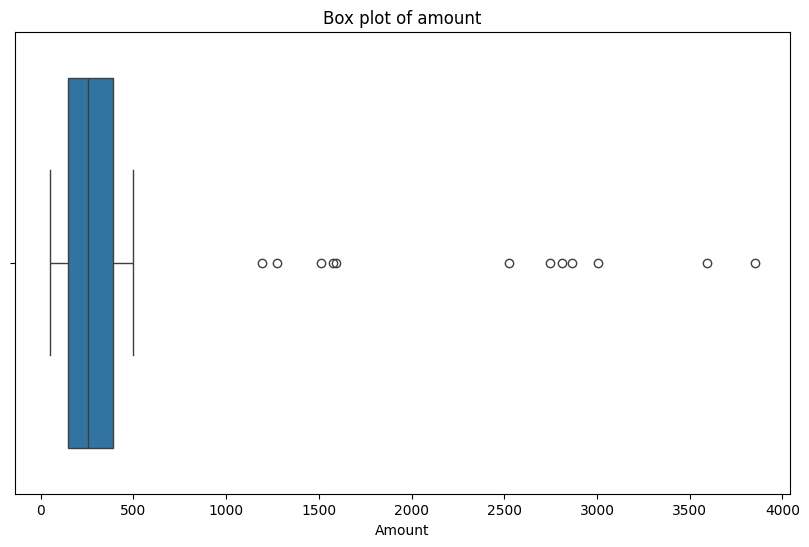

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Amount')
plt.title("Box plot of amount")
plt.show()

We are gonna keep the outliers as this is healthcare bill amount and it could vary and can go very high as well

## EDA

In [143]:
df.describe()

,Account ID,Amount
count,110.000000,110.000000
mean,1048.000000,479.309018
std,28.809721,738.759966
min,1001.000000,50.581003
25%,1023.250000,145.411712
50%,1045.500000,253.709053
75%,1072.750000,392.219435
max,1100.000000,3849.771331


Above is basic statistical information of the dataset

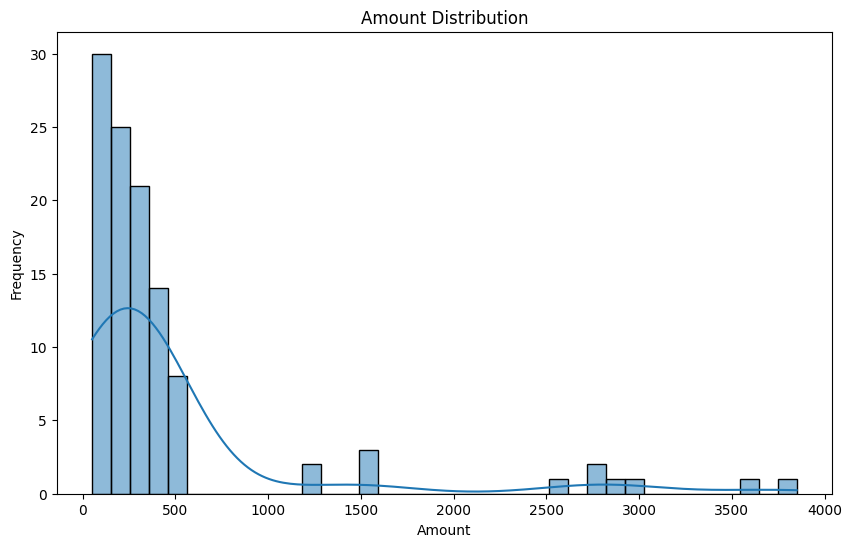

In [144]:
# Histogram for Amount
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'],kde=True)
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [146]:
# Calculate average payment amount
average_payment_amount = df['Amount'].mean()
print(f"Average payment amount: {average_payment_amount:.2f}")

Average payment amount: 479.31


Status Analysis

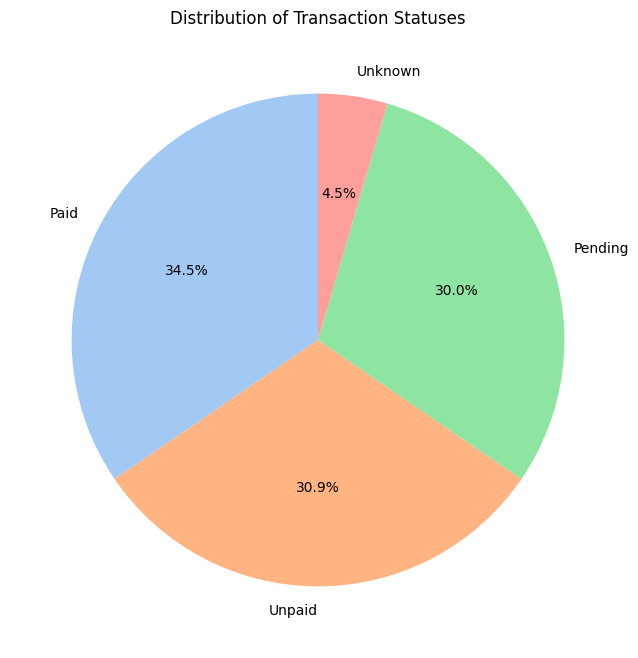

In [147]:
# Pie chart for status counts
plt.figure(figsize=(8, 8))
data['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Transaction Statuses')
plt.ylabel('')
plt.show()

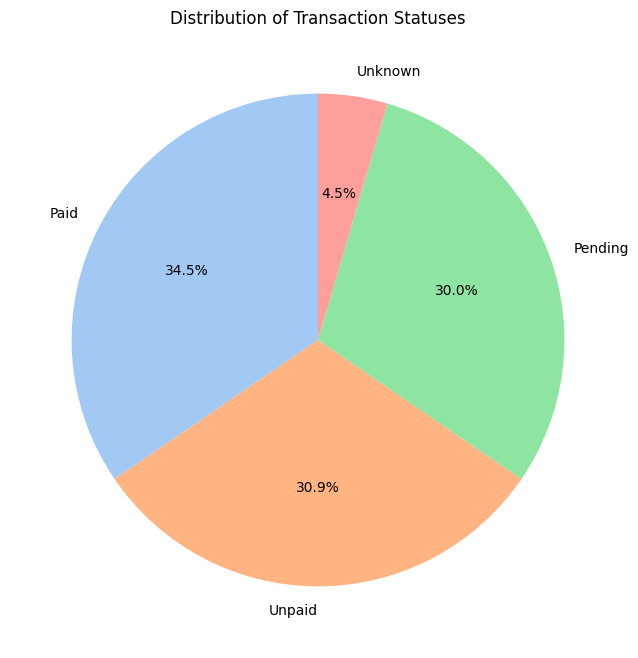

In [148]:
# Pie chart for status counts
plt.figure(figsize=(8, 8))
data['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Transaction Statuses')
plt.ylabel('')
plt.show()

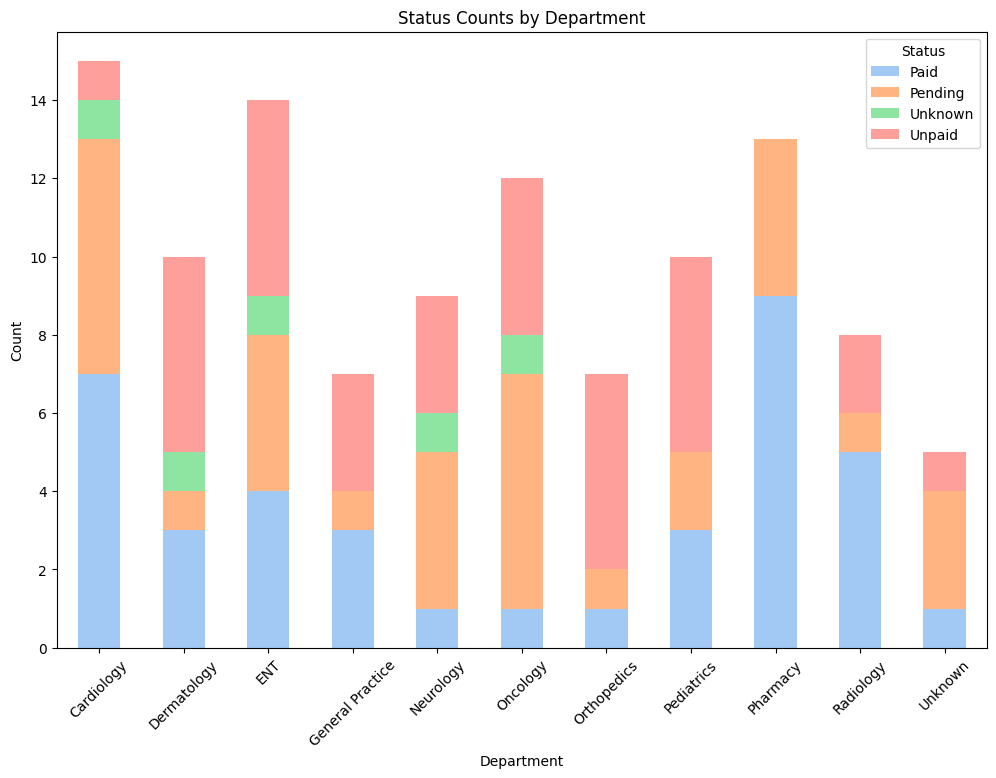

In [149]:
# a pivot table to aggregate counts of statuses per department
pivot_table = df.pivot_table(index='Department', columns='Status', aggfunc='size', fill_value=0)

# Stacked bar chart for status counts per department
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=sns.color_palette("pastel"))
plt.title('Status Counts by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

In [150]:
pivot_table

Status,Paid,Pending,Unknown,Unpaid
Department,,,,
Cardiology,7,6,1,1
Dermatology,3,1,1,5
ENT,4,4,1,5
General Practice,3,1,0,3
Neurology,1,4,1,3
Oncology,1,6,1,4
Orthopedics,1,1,0,5
Pediatrics,3,2,0,5
Pharmacy,9,4,0,0


Department analysis

Department
Cardiology          15
ENT                 14
Pharmacy            13
Oncology            12
Pediatrics          10
Dermatology         10
Neurology            9
Radiology            8
Orthopedics          7
General Practice     7
Unknown              5
Name: count, dtype: int64


<ipython-input-151-a47da2d91d33>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_counts.index, y=department_counts.values, palette="pastel")


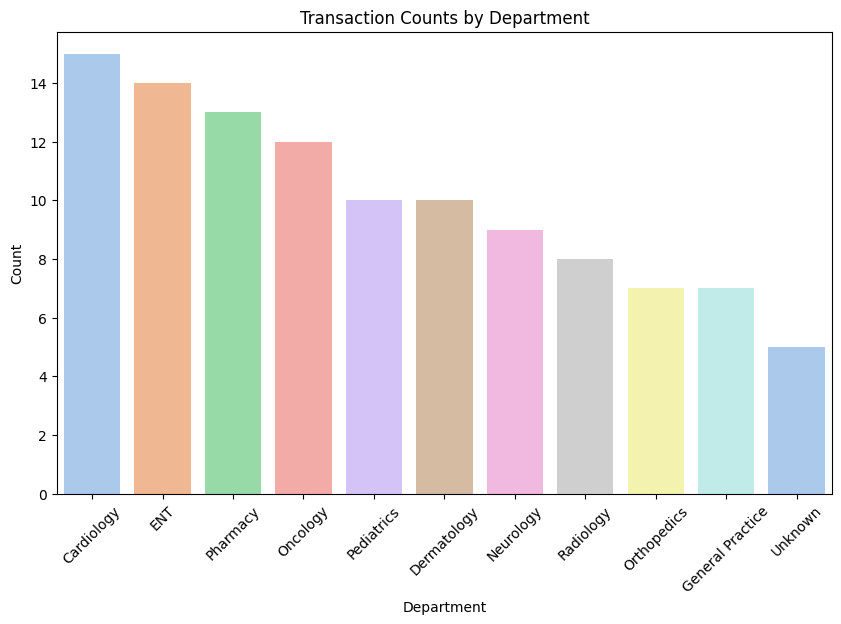

In [151]:
# Count of transactions per department
department_counts = data['Department'].value_counts()
print(department_counts)

# Bar plot of department counts
plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette="pastel")
plt.title('Transaction Counts by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Department
Cardiology           3435.351394
Dermatology          2957.750657
ENT                 12327.746765
General Practice     4174.839297
Neurology            4101.849231
Oncology             8110.286370
Orthopedics          1643.767133
Pediatrics           5561.996201
Pharmacy             3752.991825
Radiology            1657.427957
Unknown              4999.985161
Name: Amount, dtype: float64


<ipython-input-152-d0f0a9995481>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_amount_by_department.index, y=total_amount_by_department.values, palette="pastel")


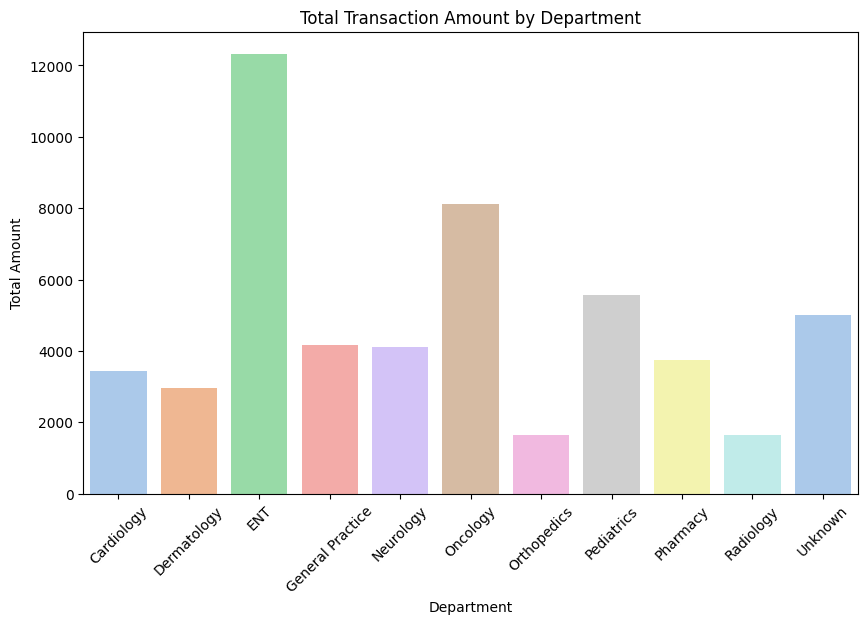

In [152]:
# Total transaction amount per department
total_amount_by_department = data.groupby('Department')['Amount'].sum()
print(total_amount_by_department)

# Bar plot of total transaction amount per department
plt.figure(figsize=(10, 6))
sns.barplot(x=total_amount_by_department.index, y=total_amount_by_department.values, palette="pastel")
plt.title('Total Transaction Amount by Department')
plt.xlabel('Department')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

DESCRIPTION ANALYSIS

In [153]:
#unique values in description
description_counts = data['Description'].value_counts()
description_counts

Description
Follow-up        15
Emergency        14
Consultation     13
Purchase         10
Lab Test         10
Refund           10
Therapy           9
Procedure         9
Medication        9
Service Fee       6
Miscellaneous     5
Name: count, dtype: int64

Description
Follow-up       15
Emergency       14
Consultation    13
Purchase        10
Lab Test        10
Refund          10
Therapy          9
Procedure        9
Medication       9
Service Fee      6
Name: count, dtype: int64


<ipython-input-154-e3467c9d27a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_descriptions.values, y=most_common_descriptions.index, palette="pastel")


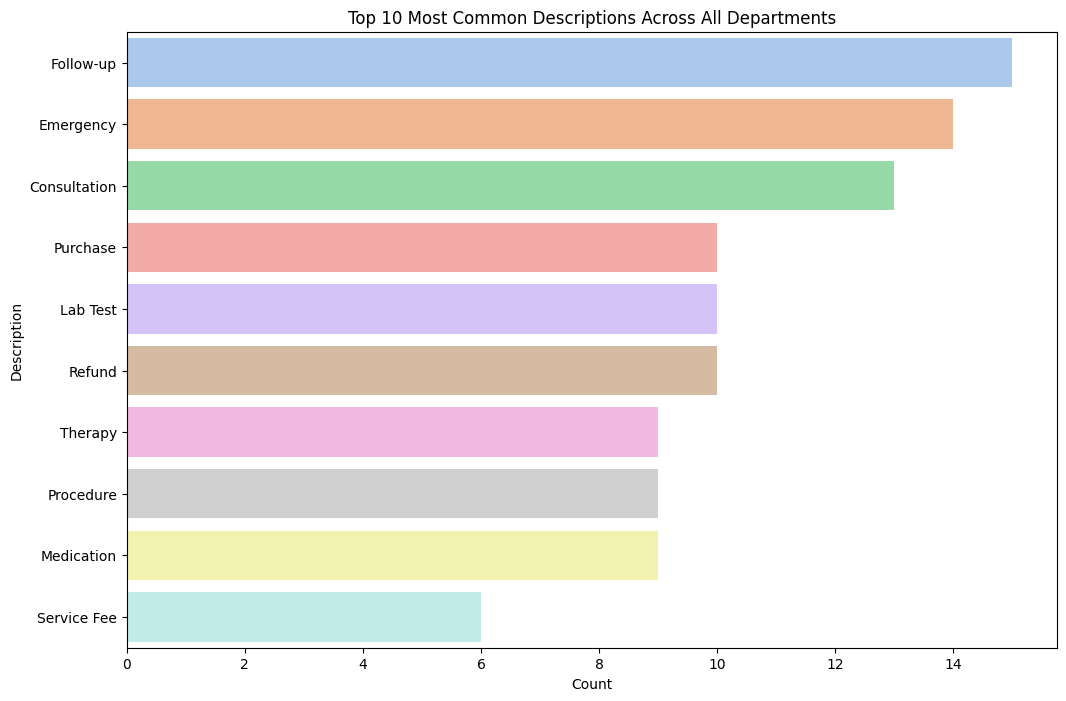

In [154]:
# getting the most common descriptions overall
most_common_descriptions = data['Description'].value_counts().head(10)
print(most_common_descriptions)

# Bar plot of the most common descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x=most_common_descriptions.values, y=most_common_descriptions.index, palette="pastel")
plt.title('Top 10 Most Common Descriptions Across All Departments')
plt.xlabel('Count')
plt.ylabel('Description')
plt.show()

<ipython-input-155-8dad4e4f305b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Amount', data=data, palette="pastel")


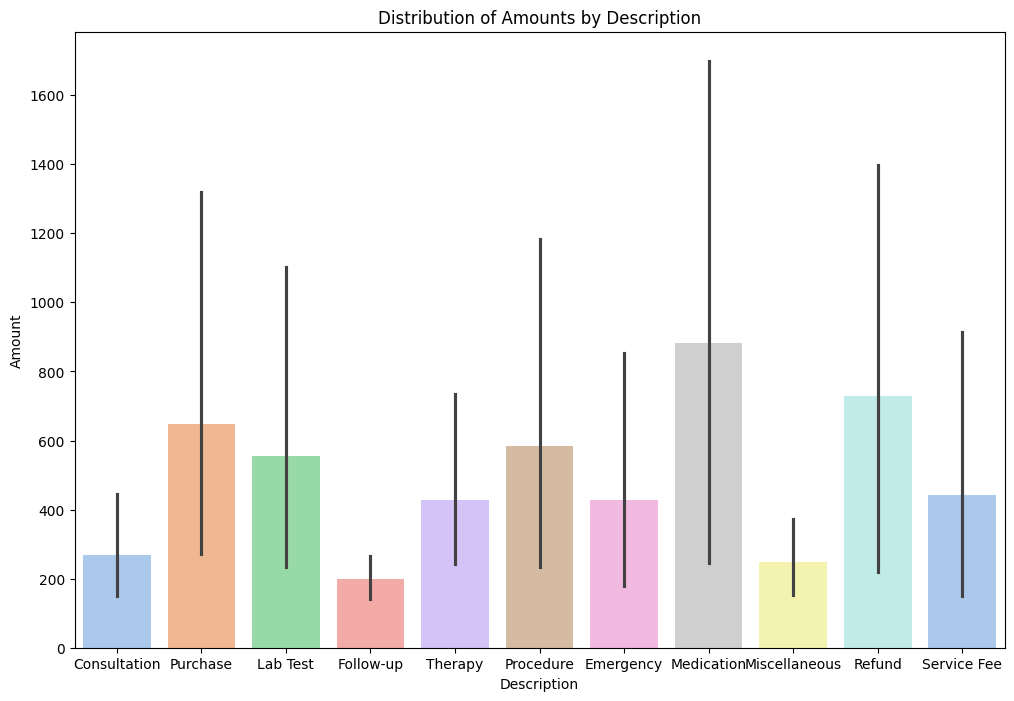

In [155]:
# Bar plot of amounts for different descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x='Description', y='Amount', data=data, palette="pastel")
plt.title('Distribution of Amounts by Description')
plt.xlabel('Description')
plt.ylabel('Amount')

plt.show()

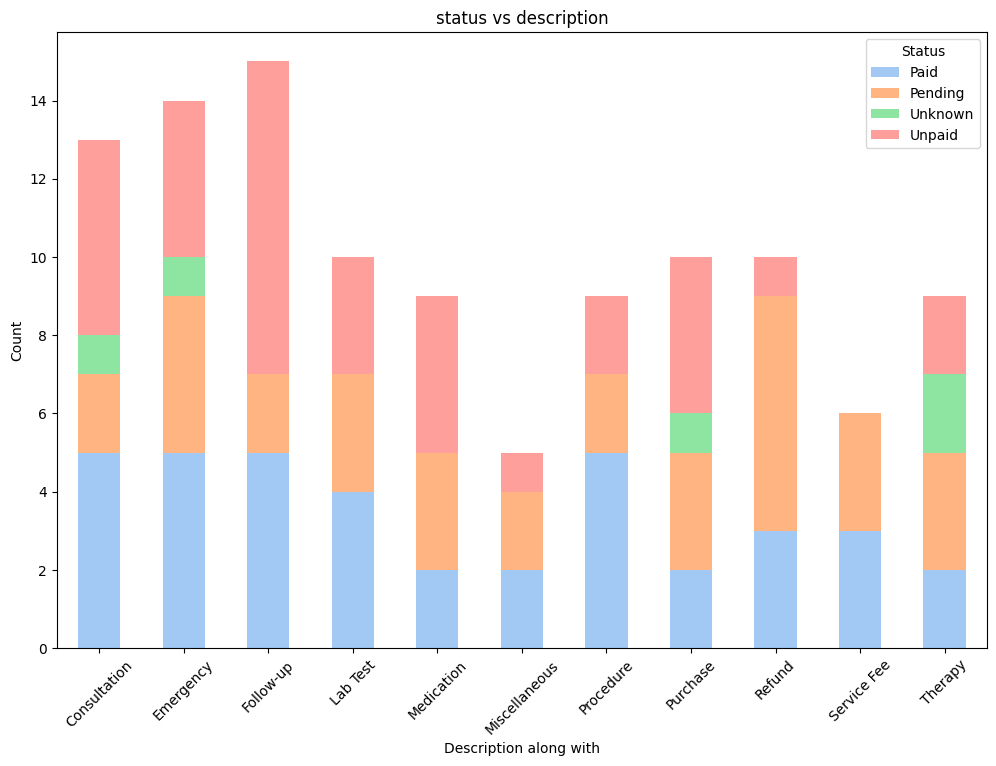

In [156]:
# pivot table to aggregate counts of status of description
pivot_table = df.pivot_table(index='Description', columns='Status', aggfunc='size', fill_value=0)

# Stacked bar chart for status of description
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=sns.color_palette("pastel"))
plt.title('status vs description')
plt.xlabel('Description along with')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

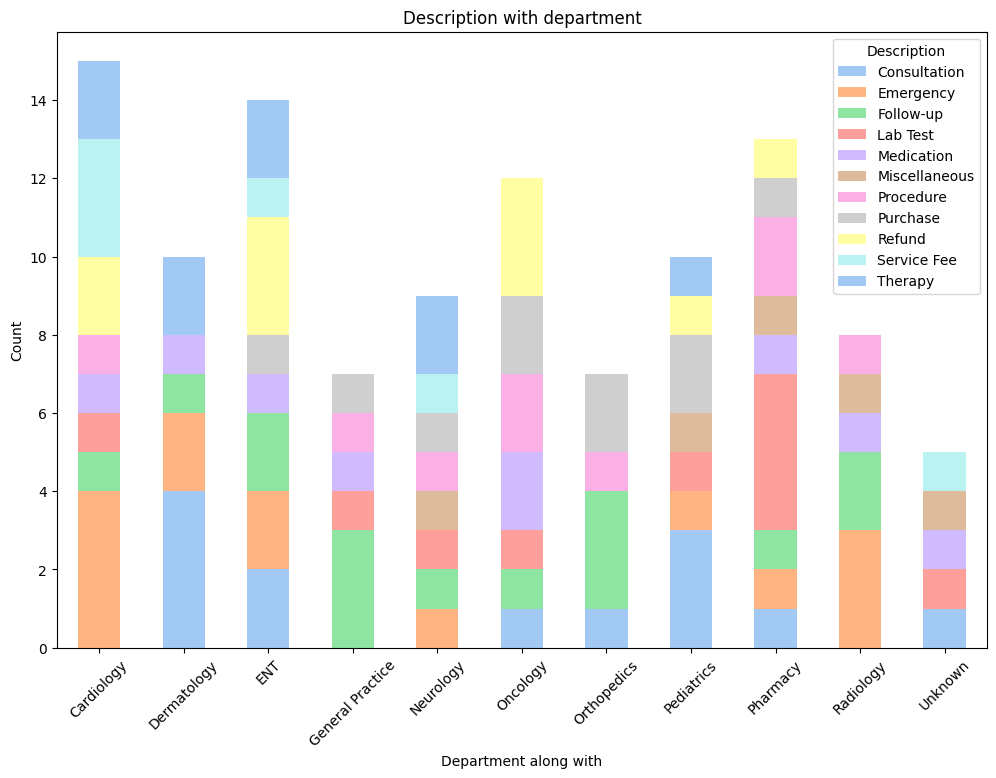

In [157]:
# pivot table to aggregate counts of description wtih department
pivot_table = df.pivot_table(index='Department', columns='Description', aggfunc='size', fill_value=0)

# Stacked bar chart for department along with description
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=sns.color_palette("pastel"))
plt.title('Description with department')
plt.xlabel('Department along with')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Description')
plt.show()